# SmartCents: Classification Algorithm

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.color_palette("Set2")

In [307]:
data = pd.read_csv("./data/response.csv")
data.head()

,Gender,Education,Occupation,Industry,Annual Income (INR),Marital Status,Region of Current Residence,Work Experience,"Suppose you had Rs.100 in a savings account and the interest rate was 2 percent per year. After 5 years, how much do you think you would have in the account if you left the money to grow?","Suppose you had Rs.100 in a savings account and the interest rate is 20 percent per year and you never withdraw money or interest payments. After 5 years, how much would you have on this account in total?",...,[I have started Planning for my retirement],[I have a formal retirement plan developed in consultation with a financial professional],[I know the amount I need to fund my retirement],[I have sufficient contribution in my Employment Provident fund],[I pay my mortgage and hire purchase installments on time every month.],"[I understand my risk profile- high risk taker, medium risk taker, or low risk taker]",[I always keep savings for any medical emergencies],[I consider travel expenses as a part of my financial planning],[The principal of compounding interest works for me in my investment.],"[If I were given an amount of equal to six month salary to invest, I would know exactly what to do with it.]"
0,2,3,1,2,4,3,1,4,1,1,...,5,3,4,3,5,5,4,3,5,5
1,1,1,1,2,4,2,2,3,1,1,...,5,2,5,4,5,5,5,5,4,4
2,1,1,1,2,4,2,2,3,1,1,...,5,2,5,4,5,5,5,5,4,4
3,2,3,1,2,3,3,2,3,1,1,...,4,4,4,4,5,3,3,3,3,3
4,1,1,1,2,4,3,2,4,1,1,...,5,5,4,4,4,4,5,5,5,5


In [308]:
# Remove columns that are not important

data.drop(
    [
        "Gender",
        "Education",
        "Occupation",
        "Industry",
        "Annual Income (INR)",
        "Marital Status",
        "Region of Current Residence",
        "Work Experience",
        "Suppose you had Rs.100 in a savings account and the interest rate was 2 percent per year. After 5 years, how much do you think you would have in the account if you left the money to grow?",
        "Suppose you had Rs.100 in a savings account and the interest rate is 20 percent per year and you never withdraw money or interest payments. After 5 years, how much would you have on this account in total? ",
        "Imagine that the interest rate on your savings account was 1 percent per year and inflation was 2 percent per year. After 1 year, how much would you be able to buy with the money in this account? ",
        "Assume a friend inherits Rs.10, 000 today and 0 inherits Rs.10,000 three years from now. Who is richer because of the inheritance?",
        "Suppose that in the current year, your income has doubled and prices of all goods have doubled too. How much do you think, you will be able to buy with your income?",
        "Which of the following statements describe the main function of the stock market?",
        "Which of the following statement regarding mutual funds is correct? ",
        "If the interest rate falls, what should happen to bond/ debenture prices? ",
        "Buying a 1 company stock usually provides a safer return than a stock mutual fund.",
        "Stocks are normally riskier than bonds. ",
        "Considering a long time period of 10 or 20 years, which asset normally gives the highest long period return?",
        " Normally, which asset displays the highest fluctuations over time?",
        "When an investor spreads his money among different assets, does the risk of losing money",
        "Total score FL",
    ],
    inplace=True,
    axis=1,
)

In [309]:
data.columns

Index([' [I know what is financial planning]',
       ' [I set financial goals and objectives in my life]',
       ' [I gather relevant data and analyze my current financial position before I make a financial decision i.e. buy a house, car, vacation, etc.]',
       ' [I execute my financial plan with the help of experts i.e. tax advisor, insurance advisor, mutual fund advisor, etc.]',
       ' [I review my financial plan periodically after the implementation.]',
       ' [I am aware about different tax saving schemes available in the market.]',
       ' [I utilize the various tax relieves and rebate that I am entitled to when I am filing in my tax return.]',
       ' [I manage my own taxes]',
       ' [I feel that interest charged by financial institutions on credit card outstanding amount is reasonable.]',
       ' [Personal loans offer by financial institutions in the market is a convenient tool for me to use- I can borrow for any reason at any point of time.]',
       ' [I have star

In [310]:
# Rename columns
data.columns = [
    "Financial_Planning",
    "Financial_Goals",
    "Analyze_Financial_Position",
    "Financial_Advice",
    "Review_Financial_Plan",
    "Tax_Saving_Schemes",
    "Tax_Benefits_Deductions",
    "Tax_Management",
    "Reasonable_Card_Interest",
    "Flexible_Loan_Options",
    "Retirement_Plan",
    "Formal_Retirement_Plan",
    "Retirement_Funds",
    "Adequate_Fund_Savings",
    "Prompt_Installment_Payments",
    "Profile_Risk",
    "Emergency_Savings",
    "Consider_Travel_Expenses",
    "Compound_Interest_Benefits",
    "Investment_Readiness",
]

In [311]:
data.isnull().sum()

Financial_Planning             0
Financial_Goals                3
Analyze_Financial_Position     0
Financial_Advice               0
Review_Financial_Plan          0
Tax_Saving_Schemes             0
Tax_Benefits_Deductions        0
Tax_Management                 0
Reasonable_Card_Interest       0
Flexible_Loan_Options          0
Retirement_Plan                0
Formal_Retirement_Plan         0
Retirement_Funds               0
Adequate_Fund_Savings          0
Prompt_Installment_Payments    0
Profile_Risk                   0
Emergency_Savings              0
Consider_Travel_Expenses       0
Compound_Interest_Benefits     0
Investment_Readiness           0
dtype: int64

In [312]:
data.dropna(axis=0, inplace=True)
print(f"Shape: {data.shape}")

Shape: (535, 20)


In [313]:
data.isnull().sum()

Financial_Planning             0
Financial_Goals                0
Analyze_Financial_Position     0
Financial_Advice               0
Review_Financial_Plan          0
Tax_Saving_Schemes             0
Tax_Benefits_Deductions        0
Tax_Management                 0
Reasonable_Card_Interest       0
Flexible_Loan_Options          0
Retirement_Plan                0
Formal_Retirement_Plan         0
Retirement_Funds               0
Adequate_Fund_Savings          0
Prompt_Installment_Payments    0
Profile_Risk                   0
Emergency_Savings              0
Consider_Travel_Expenses       0
Compound_Interest_Benefits     0
Investment_Readiness           0
dtype: int64

In [314]:
data["Financial_Goals"] = data["Financial_Goals"].astype(np.int64)
data.dtypes

Financial_Planning             int64
Financial_Goals                int64
Analyze_Financial_Position     int64
Financial_Advice               int64
Review_Financial_Plan          int64
Tax_Saving_Schemes             int64
Tax_Benefits_Deductions        int64
Tax_Management                 int64
Reasonable_Card_Interest       int64
Flexible_Loan_Options          int64
Retirement_Plan                int64
Formal_Retirement_Plan         int64
Retirement_Funds               int64
Adequate_Fund_Savings          int64
Prompt_Installment_Payments    int64
Profile_Risk                   int64
Emergency_Savings              int64
Consider_Travel_Expenses       int64
Compound_Interest_Benefits     int64
Investment_Readiness           int64
dtype: object

In [315]:
# Remove Topics that are not important
not_important = [
    "Tax_Benefits_Deductions",
    "Tax_Management",
    "Reasonable_Card_Interest",
    "Retirement_Plan",
    "Formal_Retirement_Plan",
    "Retirement_Funds",
    "Adequate_Fund_Savings",
    "Emergency_Savings",
    "Consider_Travel_Expenses",
    "Compound_Interest_Benefits",
    "Financial_Advice",
    "Review_Financial_Plan",
    "Investment_Readiness",
    "Flexible_Loan_Options",
]
# "Prompt_Installment_Payments",


data.drop(not_important, axis=1, inplace=True)


data.head()

,Financial_Planning,Financial_Goals,Analyze_Financial_Position,Tax_Saving_Schemes,Prompt_Installment_Payments,Profile_Risk
0,5,5,5,4,5,5
1,5,4,3,4,5,5
2,5,4,3,4,5,5
3,4,4,4,4,5,3
4,5,5,4,4,4,4


In [316]:
survey_results_clean = pd.read_csv("./data/survey_results_clean.csv")
survey_results_clean["Taxes"] = data["Tax_Saving_Schemes"].mode()[0]
survey_results_clean

,Investment_Understanding,Credit_Management,Money_Management,Budget_Preparation,Regular_Saving_Habit,Taxes
0,4,3,3,3,3,4
1,2,2,3,3,2,4
2,1,1,1,1,1,4
3,2,1,2,3,2,4
4,2,2,2,2,1,4
...,...,...,...,...,...,...
260,2,2,4,3,2,4
261,2,3,3,4,2,4
262,4,3,3,4,3,4
263,3,2,3,2,3,4


In [317]:
topic_mapping = {
    "Financial_Planning": "Financial Planning",
    "Financial_Goals": "Budget & Savings",
    "Analyze_Financial_Position": "Frugal Living and Spending Wisely",
    "Tax_Saving_Schemes": "Understanding Taxes",
    "Prompt_Installment_Payments": "Debt Management",
    "Profile_Risk": "Investment Basics",
}

In [318]:
column_mapping = {
    "Budget_Preparation": "Financial_Planning",
    "Money_Management": "Financial_Goals",
    "Regular_Saving_Habit": "Analyze_Financial_Position",
    "Taxes": "Tax_Saving_Schemes",
    "Investment_Understanding": "Profile_Risk",
    "Credit_Management": "Prompt_Installment_Payments",
}


combined_dfs = []
for new_col, old_col in column_mapping.items():

    new_df = pd.DataFrame(survey_results_clean[new_col].values, columns=[old_col])

    combined_df = pd.concat([data[[old_col]], new_df], ignore_index=True)

    combined_dfs.append(combined_df)


df_combined = pd.concat(combined_dfs, axis=1)


df_combined

,Financial_Planning,Financial_Goals,Analyze_Financial_Position,Tax_Saving_Schemes,Profile_Risk,Prompt_Installment_Payments
0,5,5,5,4,5,5
1,5,4,3,4,5,5
2,5,4,3,4,5,5
3,4,4,4,4,3,5
4,5,5,4,4,4,4
...,...,...,...,...,...,...
795,3,4,2,4,2,2
796,4,3,2,4,2,3
797,4,3,3,4,4,3
798,2,3,3,4,3,2


In [319]:
df_combined.shape

(800, 6)

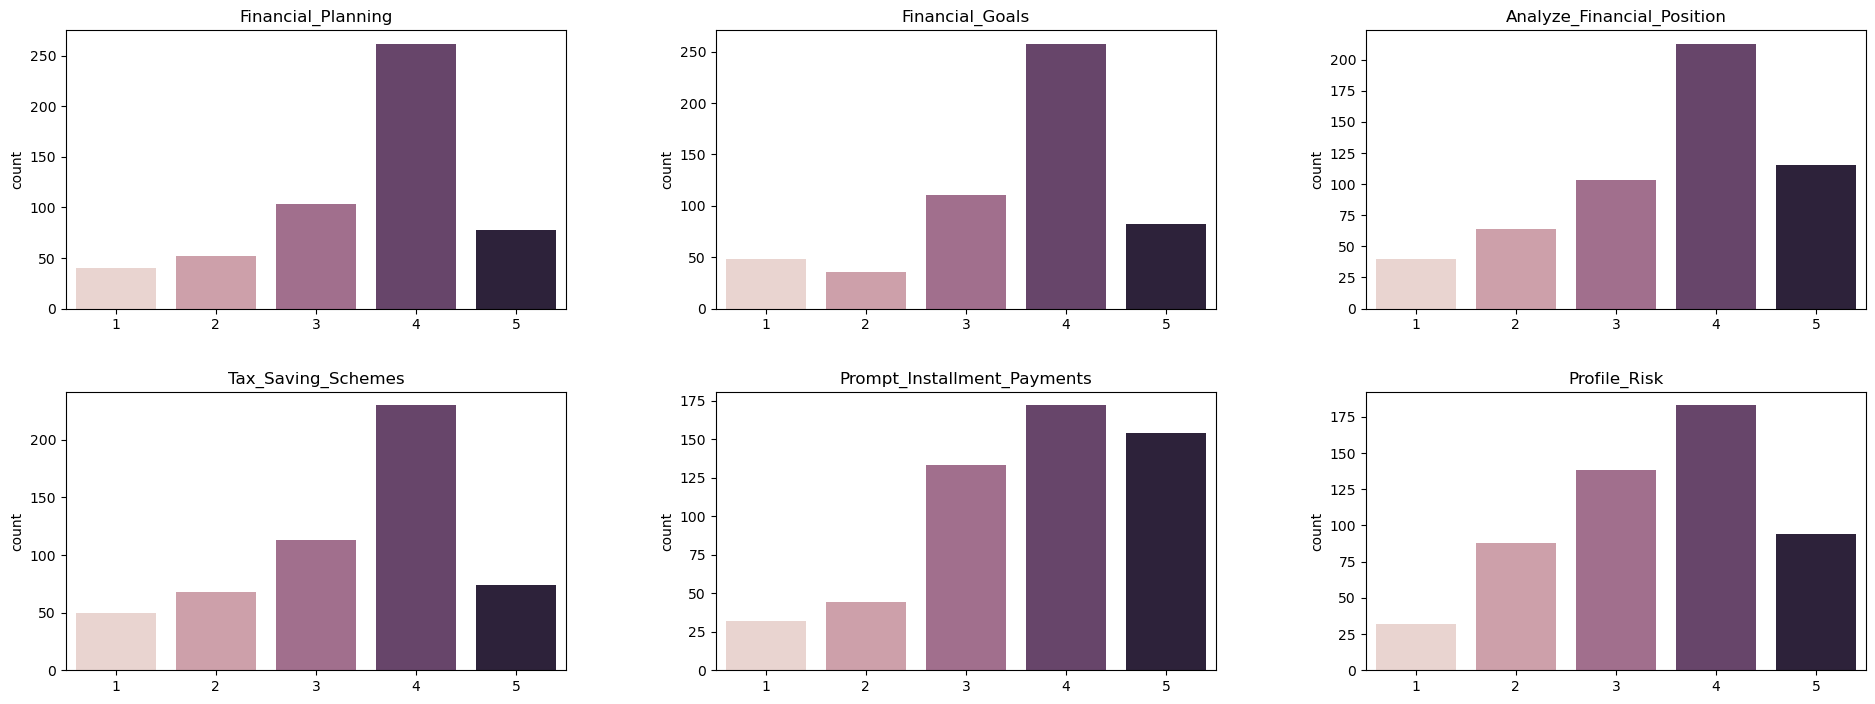

In [320]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
ax = ax.flatten()
cols = data.columns

for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, hue=col, ax=ax[i], legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel(None)


plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)
plt.show()

In [321]:
def recommend_course(row):
    min_value = row.min()
    lowest_topics = row[row == min_value].index.tolist()
    lowest_topics.sort()
    recommended_courses = [
        topic_mapping.get(topic, "Unknown Topic") for topic in lowest_topics
    ]
    unique_courses = sorted(set(recommended_courses))
    return ", ".join(unique_courses)


data["Recommended_Course"] = data.apply(recommend_course, axis=1)

c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


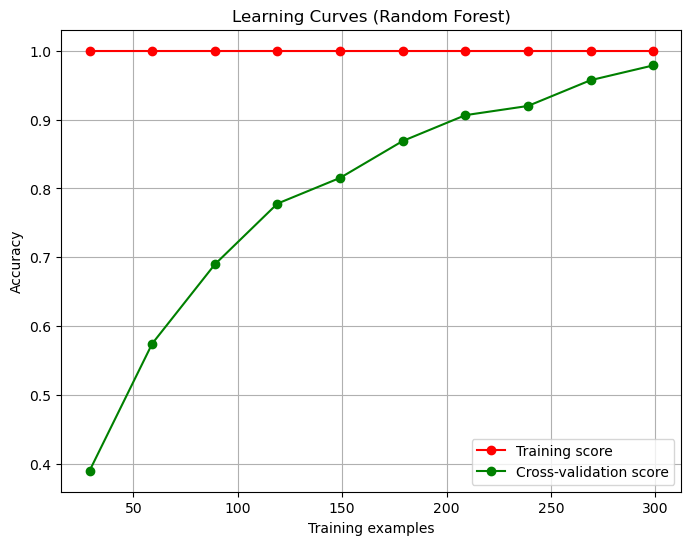

c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


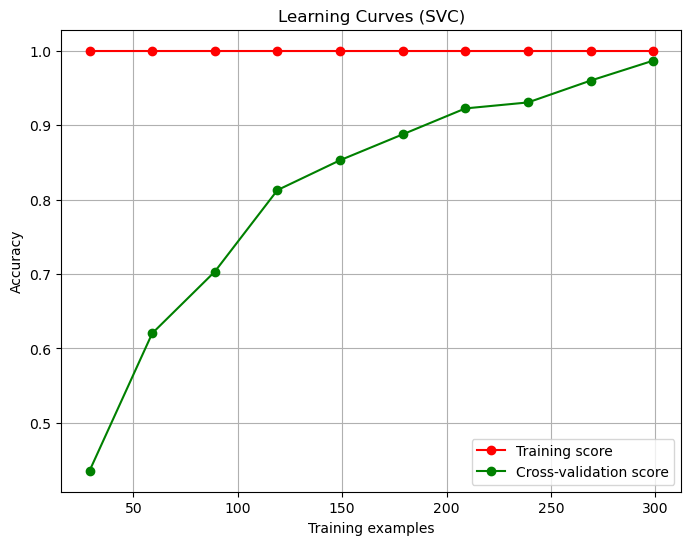

c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


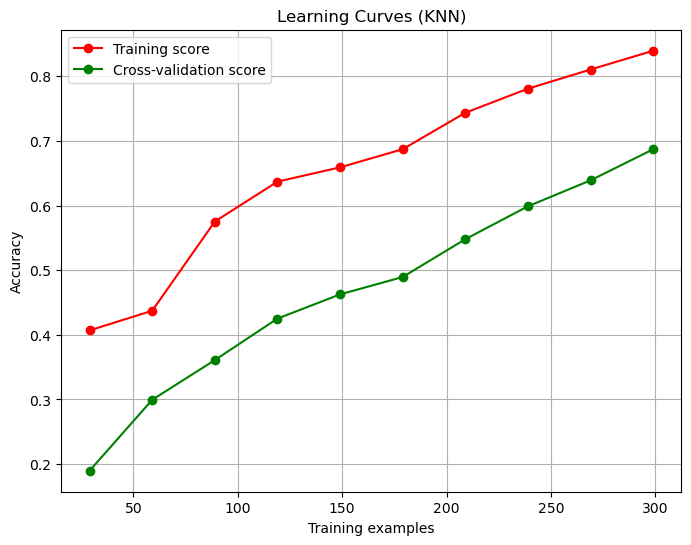

c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


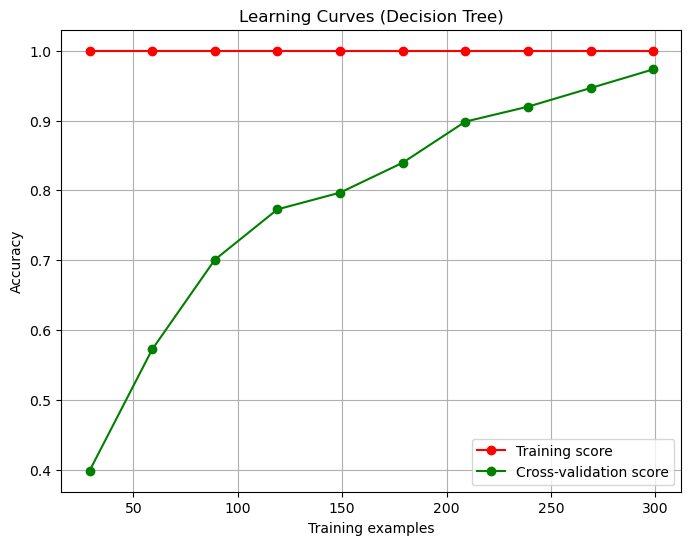

In [322]:
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


X = data.drop(columns=["Recommended_Course"])
y = data["Recommended_Course"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

models = {
    "Random Forest": RandomForestClassifier(
        # max_depth=10,
        # min_samples_leaf=1,
        # min_samples_split=2,
        # n_estimators=50,
    ),
    # "SVC": SVC(C=100, gamma=0.01, kernel="linear"),
    "SVC": SVC(C=100, gamma=0.01, kernel="linear"),
    "KNN": KNeighborsClassifier(
        # metric="euclidean",
        # n_neighbors=3,
        # weights="distance",
    ),
    "Decision Tree": DecisionTreeClassifier(
        # max_depth=20,
        # min_samples_leaf=1,
        # min_samples_split=2,
    ),
}

for name, model in models.items():
    pipeline = Pipeline([("classifier", model)])
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(f"Learning Curves ({name})")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    plt.show()

In [323]:
topic_mapping

{'Financial_Planning': 'Financial Planning',
 'Financial_Goals': 'Budget & Savings',
 'Analyze_Financial_Position': 'Frugal Living and Spending Wisely',
 'Tax_Saving_Schemes': 'Understanding Taxes',
 'Prompt_Installment_Payments': 'Debt Management',
 'Profile_Risk': 'Investment Basics'}

In [324]:
new_data = pd.DataFrame(
    {
        "Financial_Planning": [4],
        "Financial_Goals": [1],
        "Analyze_Financial_Position": [4],
        "Tax_Saving_Schemes": [1],
        "Prompt_Installment_Payments": [4],
        "Profile_Risk": [1],
    }
)

In [325]:
rfc = RandomForestClassifier(
    # max_depth=10,
    # min_samples_leaf=1,
    # min_samples_split=2,
    # n_estimators=50,
)
# svc = SVC(C=100, gamma=0.01, kernel="linear")
svc = SVC()

knn = KNeighborsClassifier(
    # metric="euclidean",
    # n_neighbors=3,
    # weights="distance",
)
dtc = DecisionTreeClassifier(
    # max_depth=20,
    # min_samples_leaf=1,
    # min_samples_split=2,
)

In [326]:
rfc.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [327]:
rfc.predict(new_data)

array(['Investment Basics'], dtype=object)

In [328]:
svc.predict(new_data)

array(['Budget & Savings'], dtype=object)

In [329]:
knn.predict(new_data)

array(['Budget & Savings'], dtype=object)

In [330]:
dtc.predict(new_data)

array(['Investment Basics, Understanding Taxes'], dtype=object)

In [331]:
data.head(25)

,Financial_Planning,Financial_Goals,Analyze_Financial_Position,Tax_Saving_Schemes,Prompt_Installment_Payments,Profile_Risk,Recommended_Course
0,5,5,5,4,5,5,Understanding Taxes
1,5,4,3,4,5,5,Frugal Living and Spending Wisely
2,5,4,3,4,5,5,Frugal Living and Spending Wisely
3,4,4,4,4,5,3,Investment Basics
4,5,5,4,4,4,4,"Debt Management, Frugal Living and Spending Wi..."
5,2,3,2,2,2,2,"Debt Management, Financial Planning, Frugal Li..."
6,3,4,3,3,3,4,"Debt Management, Financial Planning, Frugal Li..."
7,2,2,2,4,3,4,"Budget & Savings, Financial Planning, Frugal L..."
8,4,4,5,4,5,4,"Budget & Savings, Financial Planning, Investme..."
9,3,3,3,3,3,3,"Budget & Savings, Debt Management, Financial P..."
